In [66]:
# Importing Necessary Libraries
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten,BatchNormalization
from keras.layers import Conv2D, MaxPooling2D,GlobalAveragePooling2D
from keras.utils import to_categorical
import keras.utils as image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from keras.optimizers import SGD, Adam
from keras.callbacks import EarlyStopping
from keras.callbacks import TensorBoard

%matplotlib inline

In [2]:
pwd

'/Users/mohamednoordeenalaudeen/Documents/PersonalGit/DataScienceMasterclass/24. CNN Theory - Practical/AnalyticsVidhya MNIST Competiotion'

In [3]:
path = '/Users/mohamednoordeenalaudeen/Documents/PersonalGit/DataScienceMasterclass/24. CNN Theory - Practical/AnalyticsVidhya MNIST Competiotion/Train_UQcUa52'


In [4]:
train = pd.read_csv(path+"/train.csv")    # reading the csv file

# printing first five rows of the file
train.head()

,filename,label
0,0.png,4
1,1.png,9
2,2.png,1
3,3.png,7
4,4.png,3


In [18]:
y_train = to_categorical(train['label'])

In [19]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [5]:
path+'images/'+train['filename'][0]

'/Users/mohamednoordeenalaudeen/Documents/PersonalGit/DataScienceMasterclass/24. CNN Theory - Practical/AnalyticsVidhya MNIST Competiotion/Train_UQcUa52images/0.png'

In [6]:
train['filename'][0]

'0.png'

In [7]:
path+'/Images/train/'+train['filename'][0]

'/Users/mohamednoordeenalaudeen/Documents/PersonalGit/DataScienceMasterclass/24. CNN Theory - Practical/AnalyticsVidhya MNIST Competiotion/Train_UQcUa52/Images/train/0.png'

In [8]:
pic = image.load_img(path+'/Images/train/'+train['filename'][0],target_size=(28,28,1))


In [9]:
image.img_to_array(pic)


array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

100%|███████████████████████████████████| 49000/49000 [00:06<00:00, 7398.94it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


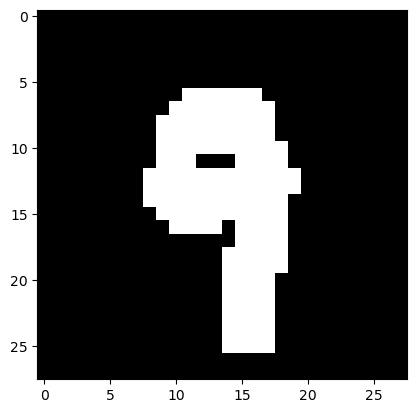

In [10]:
train_image = []
for i in tqdm(range(train.shape[0])):
    img = image.load_img(path+'/Images/train/'+train['filename'][i],target_size=(28,28,3))
    img = image.img_to_array(img)
    #img = img/255
    train_image.append(img)
X = np.array(train_image)
X.shape 
plt.imshow(X[1])

In [74]:
X[1]

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [11]:
X.shape

(49000, 28, 28, 3)

In [12]:
X[0].shape

(28, 28, 3)

In [13]:
path_test = '/Users/mohamednoordeenalaudeen/Documents/PersonalGit/DataScienceMasterclass/24. CNN Theory - Practical/AnalyticsVidhya MNIST Competiotion/'

In [14]:
test = pd.read_csv(path_test +"/Test_fCbTej3_0j1gHmj.csv")    # reading the csv file
test_image = []
for i in tqdm(range(test.shape[0])):
    img = image.load_img(path+'/Images/test/'+test['filename'][i],target_size=(28,28,3))
    img = image.img_to_array(img)
    #img = img/255
    test_image.append(img)
X_test = np.array(test_image)


100%|███████████████████████████████████| 21000/21000 [00:03<00:00, 6381.15it/s]


In [15]:
X_test.shape

(21000, 28, 28, 3)

In [20]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [21]:
model = Sequential()

model.add(Conv2D(input_shape = (28,28,3),filters = 16, kernel_size = (3,3), strides = (2,2),
                padding='valid',kernel_initializer = 'he_normal',
                activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides = (1,1)))

model.add(Flatten())

model.add(Dense(10, kernel_initializer = 'he_normal', activation = 'relu'))
model.add(BatchNormalization())

model.add(Dense(10, kernel_initializer = 'he_normal', activation = 'softmax'))


In [22]:
model.summary()





Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 13, 13, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 16)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 10)                23050     
                                                                 
 batch_normalization (BatchN  (None, 10)               40        
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 10)                1

In [23]:
optim = Adam()
model.compile(optimizer = optim, loss = 'categorical_crossentropy', metrics = ['accuracy'] )


In [24]:

history = model.fit(X, y_train, epochs = 10, batch_size = 10, verbose = 2, validation_split = 0.4)



Epoch 1/10
2940/2940 - 5s - loss: 0.5611 - accuracy: 0.8536 - val_loss: 0.2298 - val_accuracy: 0.9345 - 5s/epoch - 2ms/step
Epoch 2/10
2940/2940 - 5s - loss: 0.2989 - accuracy: 0.9132 - val_loss: 0.2194 - val_accuracy: 0.9365 - 5s/epoch - 2ms/step
Epoch 3/10
2940/2940 - 4s - loss: 0.2668 - accuracy: 0.9231 - val_loss: 0.1871 - val_accuracy: 0.9434 - 4s/epoch - 2ms/step
Epoch 4/10
2940/2940 - 4s - loss: 0.2388 - accuracy: 0.9301 - val_loss: 0.1809 - val_accuracy: 0.9462 - 4s/epoch - 2ms/step
Epoch 5/10
2940/2940 - 5s - loss: 0.2283 - accuracy: 0.9340 - val_loss: 0.1785 - val_accuracy: 0.9463 - 5s/epoch - 2ms/step
Epoch 6/10
2940/2940 - 5s - loss: 0.2150 - accuracy: 0.9390 - val_loss: 0.2024 - val_accuracy: 0.9389 - 5s/epoch - 2ms/step
Epoch 7/10
2940/2940 - 5s - loss: 0.2083 - accuracy: 0.9396 - val_loss: 0.1956 - val_accuracy: 0.9419 - 5s/epoch - 2ms/step
Epoch 8/10
2940/2940 - 4s - loss: 0.2020 - accuracy: 0.9428 - val_loss: 0.1565 - val_accuracy: 0.9541 - 4s/epoch - 2ms/step
Epoch 9/

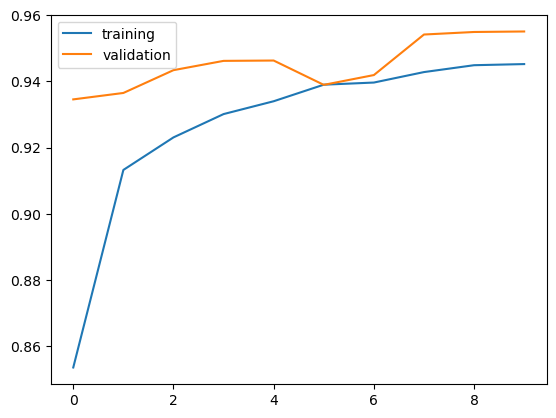

In [25]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'])
plt.show()

In [26]:
model.evaluate(X, y_train)



1532/1532 [==============================] - 1s 881us/step - loss: 0.1075 - accuracy: 0.9682


[0.10746611654758453, 0.968163251876831]

In [27]:
res = np.argmax(model.predict(X_test),axis = 1)

657/657 [==============================] - 1s 799us/step


In [28]:
res

array([4, 0, 9, ..., 6, 6, 2])

In [29]:
res_df = pd.read_csv('sample_submission_npBPSZB.csv')

In [30]:
res_df['label'] = res

In [31]:
res_df['label'].value_counts()

1    2424
9    2195
3    2170
7    2157
6    2138
0    2071
2    2068
4    2026
8    1905
5    1846
Name: label, dtype: int64

In [32]:
res_df.to_csv('mnist_cnn.csv', index= False)

In [33]:
res_df

,filename,label
0,49000.png,4
1,49001.png,0
2,49002.png,9
3,49003.png,7
4,49004.png,9
...,...,...
20995,69995.png,9
20996,69996.png,2
20997,69997.png,6
20998,69998.png,6


# Advanced CNN

In [47]:
model = Sequential()

model.add(Conv2D(input_shape = (28,28,3),filters = 16, kernel_size = (3,3), strides = (2,2),
                padding='valid',kernel_initializer = 'he_normal',
                activation = 'relu'))

model.add(MaxPooling2D(pool_size=(2, 2),strides = (1,1)))

model.add(Conv2D(input_shape = (28,28,3),filters = 16, kernel_size = (3,3), strides = (2,2),
                padding='valid',kernel_initializer = 'he_normal',
                activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides = (1,1)))


model.add(Flatten())

model.add(Dense(10, kernel_initializer = 'he_normal', activation = 'relu'))
model.add(BatchNormalization())

model.add(Dense(10, kernel_initializer = 'he_normal', activation = 'relu'))
model.add(BatchNormalization())

model.add(Dense(10, kernel_initializer = 'he_normal', activation = 'softmax'))


In [48]:
model.summary()


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 13, 13, 16)        448       
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 12, 12, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 5, 5, 16)          2320      
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 4, 4, 16)         0         
 g2D)                                                            
                                                                 
 flatten_8 (Flatten)         (None, 256)               0         
                                                                 
 dense_22 (Dense)            (None, 10)              

In [49]:
optim = Adam()
model.compile(optimizer = optim, loss = 'categorical_crossentropy', metrics = ['accuracy'] )


In [52]:
history = model.fit(X, y_train, epochs = 20, batch_size = 10, verbose = 2, validation_split = 0.4)


Epoch 1/20
2940/2940 - 5s - loss: 0.1043 - accuracy: 0.9692 - val_loss: 0.1244 - val_accuracy: 0.9635 - 5s/epoch - 2ms/step
Epoch 2/20
2940/2940 - 5s - loss: 0.0998 - accuracy: 0.9698 - val_loss: 0.0772 - val_accuracy: 0.9769 - 5s/epoch - 2ms/step
Epoch 3/20
2940/2940 - 5s - loss: 0.0976 - accuracy: 0.9704 - val_loss: 0.0860 - val_accuracy: 0.9756 - 5s/epoch - 2ms/step
Epoch 4/20
2940/2940 - 5s - loss: 0.0951 - accuracy: 0.9702 - val_loss: 0.0823 - val_accuracy: 0.9761 - 5s/epoch - 2ms/step
Epoch 5/20
2940/2940 - 5s - loss: 0.0908 - accuracy: 0.9719 - val_loss: 0.1388 - val_accuracy: 0.9589 - 5s/epoch - 2ms/step
Epoch 6/20
2940/2940 - 5s - loss: 0.0848 - accuracy: 0.9747 - val_loss: 0.0806 - val_accuracy: 0.9774 - 5s/epoch - 2ms/step
Epoch 7/20
2940/2940 - 5s - loss: 0.0845 - accuracy: 0.9738 - val_loss: 0.0867 - val_accuracy: 0.9754 - 5s/epoch - 2ms/step
Epoch 8/20
2940/2940 - 5s - loss: 0.0791 - accuracy: 0.9768 - val_loss: 0.0779 - val_accuracy: 0.9778 - 5s/epoch - 2ms/step
Epoch 9/

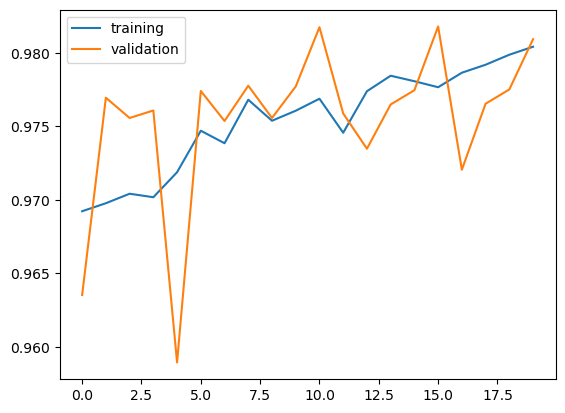

In [53]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'])
plt.show()

In [54]:
model.evaluate(X, y_train)


1532/1532 [==============================] - 2s 963us/step - loss: 0.0363 - accuracy: 0.9891


[0.036261703819036484, 0.989081621170044]

In [55]:
res_advanced_cnn = np.argmax(model.predict(X_test),axis = 1)

657/657 [==============================] - 1s 915us/step


In [56]:
res_advanced_cnn

array([4, 0, 9, ..., 6, 6, 2])

In [57]:
res_df['label'] = res_advanced_cnn

In [58]:
res_df.to_csv('mnist_advanced_cnn.csv', index= False)

In [61]:
model = Sequential()

model.add(Conv2D(input_shape = (28,28,3),filters = 16, kernel_size = (3,3), strides = (2,2),
                padding='valid',kernel_initializer = 'he_normal',
                activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),strides = (1,1)))

model.add(Conv2D(input_shape = (28,28,3),filters = 16, kernel_size = (3,3), strides = (2,2),
                padding='valid',kernel_initializer = 'he_normal',
                activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),strides = (1,1)))


model.add(Flatten())

model.add(Dense(10, kernel_initializer = 'he_normal', activation = 'relu'))
model.add(BatchNormalization())

model.add(Dense(10, kernel_initializer = 'he_normal', activation = 'relu'))
model.add(BatchNormalization())

model.add(Dense(10, kernel_initializer = 'he_normal', activation = 'softmax'))


In [62]:
optim = Adam()
model.compile(optimizer = optim, loss = 'categorical_crossentropy', metrics = ['accuracy'] )


In [63]:
history = model.fit(X, y_train, epochs = 20, batch_size = 10, verbose = 2, validation_split = 0.4)


Epoch 1/20
2940/2940 - 6s - loss: 0.6922 - accuracy: 0.7876 - val_loss: 0.2103 - val_accuracy: 0.9374 - 6s/epoch - 2ms/step
Epoch 2/20
2940/2940 - 6s - loss: 0.2782 - accuracy: 0.9182 - val_loss: 0.1654 - val_accuracy: 0.9493 - 6s/epoch - 2ms/step
Epoch 3/20
2940/2940 - 7s - loss: 0.2066 - accuracy: 0.9366 - val_loss: 0.1128 - val_accuracy: 0.9653 - 7s/epoch - 2ms/step
Epoch 4/20
2940/2940 - 6s - loss: 0.1836 - accuracy: 0.9446 - val_loss: 0.1140 - val_accuracy: 0.9660 - 6s/epoch - 2ms/step
Epoch 5/20
2940/2940 - 6s - loss: 0.1602 - accuracy: 0.9517 - val_loss: 0.1214 - val_accuracy: 0.9646 - 6s/epoch - 2ms/step
Epoch 6/20
2940/2940 - 6s - loss: 0.1488 - accuracy: 0.9539 - val_loss: 0.0997 - val_accuracy: 0.9696 - 6s/epoch - 2ms/step
Epoch 7/20
2940/2940 - 6s - loss: 0.1420 - accuracy: 0.9571 - val_loss: 0.0958 - val_accuracy: 0.9721 - 6s/epoch - 2ms/step
Epoch 8/20
2940/2940 - 6s - loss: 0.1364 - accuracy: 0.9589 - val_loss: 0.0973 - val_accuracy: 0.9710 - 6s/epoch - 2ms/step
Epoch 9/

In [64]:
model.evaluate(X, y_train)

1532/1532 [==============================] - 2s 1ms/step - loss: 0.0563 - accuracy: 0.9826


[0.056330639868974686, 0.9825714230537415]

In [68]:
callback = EarlyStopping(monitor='loss', patience=3)

In [69]:
history = model.fit(X, y_train, epochs = 20, batch_size = 10, 
                    verbose = 2, validation_split = 0.4,
                    callbacks=[callback])

Epoch 1/20
2940/2940 - 6s - loss: 0.0901 - accuracy: 0.9730 - val_loss: 0.0750 - val_accuracy: 0.9779 - 6s/epoch - 2ms/step
Epoch 2/20
2940/2940 - 6s - loss: 0.0935 - accuracy: 0.9713 - val_loss: 0.0715 - val_accuracy: 0.9783 - 6s/epoch - 2ms/step
Epoch 3/20
2940/2940 - 6s - loss: 0.0901 - accuracy: 0.9729 - val_loss: 0.0745 - val_accuracy: 0.9780 - 6s/epoch - 2ms/step
Epoch 4/20
2940/2940 - 6s - loss: 0.0896 - accuracy: 0.9716 - val_loss: 0.0777 - val_accuracy: 0.9767 - 6s/epoch - 2ms/step
Epoch 5/20
2940/2940 - 6s - loss: 0.0894 - accuracy: 0.9729 - val_loss: 0.0688 - val_accuracy: 0.9799 - 6s/epoch - 2ms/step
Epoch 6/20
2940/2940 - 7s - loss: 0.0882 - accuracy: 0.9733 - val_loss: 0.0701 - val_accuracy: 0.9795 - 7s/epoch - 2ms/step
Epoch 7/20
2940/2940 - 6s - loss: 0.0823 - accuracy: 0.9748 - val_loss: 0.0801 - val_accuracy: 0.9781 - 6s/epoch - 2ms/step
Epoch 8/20
2940/2940 - 6s - loss: 0.0861 - accuracy: 0.9732 - val_loss: 0.0695 - val_accuracy: 0.9787 - 6s/epoch - 2ms/step
Epoch 9/

In [70]:
model.evaluate(X, y_train)


1532/1532 [==============================] - 2s 1ms/step - loss: 0.0464 - accuracy: 0.9864


[0.04641835764050484, 0.9863673448562622]

In [72]:
tensorboard_callback = TensorBoard(log_dir="./logs")


In [73]:
history = model.fit(X, y_train, epochs = 20, batch_size = 10, 
                    verbose = 2, validation_split = 0.4,
                    callbacks=[callback,tensorboard_callback ])

Epoch 1/20
2940/2940 - 6s - loss: 0.0731 - accuracy: 0.9766 - val_loss: 0.0753 - val_accuracy: 0.9784 - 6s/epoch - 2ms/step
Epoch 2/20
2940/2940 - 6s - loss: 0.0727 - accuracy: 0.9771 - val_loss: 0.0741 - val_accuracy: 0.9784 - 6s/epoch - 2ms/step
Epoch 3/20
2940/2940 - 6s - loss: 0.0710 - accuracy: 0.9778 - val_loss: 0.0801 - val_accuracy: 0.9776 - 6s/epoch - 2ms/step
Epoch 4/20
2940/2940 - 6s - loss: 0.0729 - accuracy: 0.9767 - val_loss: 0.0730 - val_accuracy: 0.9787 - 6s/epoch - 2ms/step
Epoch 5/20
2940/2940 - 7s - loss: 0.0693 - accuracy: 0.9784 - val_loss: 0.0713 - val_accuracy: 0.9789 - 7s/epoch - 2ms/step
Epoch 6/20
2940/2940 - 7s - loss: 0.0722 - accuracy: 0.9772 - val_loss: 0.0732 - val_accuracy: 0.9786 - 7s/epoch - 2ms/step
Epoch 7/20
2940/2940 - 6s - loss: 0.0702 - accuracy: 0.9774 - val_loss: 0.0809 - val_accuracy: 0.9765 - 6s/epoch - 2ms/step
Epoch 8/20
2940/2940 - 6s - loss: 0.0682 - accuracy: 0.9785 - val_loss: 0.0713 - val_accuracy: 0.9791 - 6s/epoch - 2ms/step
Epoch 9/